SVC真实数据案例：预测明天是否会下雨

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 查看数据

In [3]:
file_path = 'weatherAUS.csv'

num_samples = 5000
df = pd.read_csv(file_path, low_memory=False)
last_column_name = df.columns[-1]
df_no_missing_last_col = df.dropna(subset=[last_column_name])

data = df_no_missing_last_col.sample(n=num_samples, random_state=888).reset_index(drop=True)

print('前五行数据：')
print(data.head())

前五行数据：
         Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2009-11-18     Richmond     15.0     30.3       0.2          4.0       NaN   
1  2011-02-17     Watsonia     18.6     26.6      12.4          5.0       8.5   
2  2017-06-09       Hobart      5.5     15.9       0.0          0.2       7.6   
3  2009-09-29  Williamtown      8.6     22.1       0.0          6.0      11.0   
4  2014-04-02     Portland     14.6     18.8       1.4         10.0       7.1   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0         ENE           35.0        WNW  ...        61.0         36.0   
1          SE           26.0          E  ...       100.0         67.0   
2         NNW           28.0        WSW  ...        73.0         59.0   
3         NaN            NaN          W  ...        40.0         43.0   
4         WNW           48.0         SW  ...        86.0         51.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  

In [4]:
x = data.iloc[:, :-2]
y = data.iloc[:, -1]
x.shape, y.shape

((5000, 21), (5000,))

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5000 non-null   object 
 1   Location       5000 non-null   object 
 2   MinTemp        4983 non-null   float64
 3   MaxTemp        4988 non-null   float64
 4   Rainfall       4955 non-null   float64
 5   Evaporation    2901 non-null   float64
 6   Sunshine       2641 non-null   float64
 7   WindGustDir    4657 non-null   object 
 8   WindGustSpeed  4658 non-null   float64
 9   WindDir9am     4625 non-null   object 
 10  WindDir3pm     4864 non-null   object 
 11  WindSpeed9am   4942 non-null   float64
 12  WindSpeed3pm   4901 non-null   float64
 13  Humidity9am    4945 non-null   float64
 14  Humidity3pm    4889 non-null   float64
 15  Pressure9am    4492 non-null   float64
 16  Pressure3pm    4491 non-null   float64
 17  Cloud9am       3126 non-null   float64
 18  Cloud3pm

In [5]:
x.isnull().sum()

Date                0
Location            0
MinTemp            17
MaxTemp            12
Rainfall           45
Evaporation      2099
Sunshine         2359
WindGustDir       343
WindGustSpeed     342
WindDir9am        375
WindDir3pm        136
WindSpeed9am       58
WindSpeed3pm       99
Humidity9am        55
Humidity3pm       111
Pressure9am       508
Pressure3pm       509
Cloud9am         1874
Cloud3pm         1988
Temp9am            29
Temp3pm            87
dtype: int64

In [6]:
x.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0034
MaxTemp          0.0024
Rainfall         0.0090
Evaporation      0.4198
Sunshine         0.4718
WindGustDir      0.0686
WindGustSpeed    0.0684
WindDir9am       0.0750
WindDir3pm       0.0272
WindSpeed9am     0.0116
WindSpeed3pm     0.0198
Humidity9am      0.0110
Humidity3pm      0.0222
Pressure9am      0.1016
Pressure3pm      0.1018
Cloud9am         0.3748
Cloud3pm         0.3976
Temp9am          0.0058
Temp3pm          0.0174
dtype: float64

In [7]:
y.isnull().sum()

0

In [8]:
np.unique(y) # 二分类

array(['No', 'Yes'], dtype=object)

# 分集，探索标签

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=888)

# 恢复索引
for i in [xtrain, xtest, ytrain, ytest]:
    i.index = range(i.shape[0])

In [6]:
xtrain.head() # 索引恢复

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2009-02-24,Cairns,23.9,30.6,41.6,3.4,2.8,NNE,33.0,S,...,20.0,9.0,83.0,70.0,1011.1,1007.9,7.0,7.0,25.2,29.2
1,2015-04-26,Brisbane,16.7,23.4,0.0,8.0,11.0,W,50.0,WSW,...,15.0,15.0,42.0,30.0,1012.0,1010.7,0.0,1.0,19.3,22.7
2,2015-03-05,Portland,11.9,18.0,5.2,3.8,9.2,WSW,81.0,SSW,...,20.0,31.0,50.0,51.0,1019.2,1019.3,2.0,8.0,13.5,16.5
3,2012-03-08,Ballarat,12.1,19.7,0.0,NaN,NaN,ESE,57.0,ESE,...,31.0,28.0,78.0,57.0,1020.1,1017.0,3.0,6.0,13.3,17.4
4,2008-12-05,GoldCoast,19.7,29.5,0.2,NaN,NaN,NW,43.0,E,...,11.0,11.0,67.0,83.0,1017.5,1015.2,NaN,NaN,26.0,23.8


#### 探索是否存在样本不均衡问题

In [7]:
ytrain.value_counts()

RainTomorrow
No     2718
Yes     782
Name: count, dtype: int64

In [8]:
ytest.value_counts()

RainTomorrow
No     1157
Yes     343
Name: count, dtype: int64

存在一部分样本不均衡问题

#### 对标签编码

In [9]:
# 将标签编码
encoder = LabelEncoder().fit(ytrain)
# yes为少数类1， no为多数类0

In [10]:
# 使用训练集进行训练，然后在训练集和测试集是分别进行transform
ytrain = pd.DataFrame(encoder.transform(ytrain))
ytest = pd.DataFrame(encoder.transform(ytest))

In [11]:
ytrain.head()

,0
0,1
1,0
2,0
3,0
4,1


In [12]:
ytrain.to_csv('ytrain.csv')
ytest.to_csv('ytest.csv')

# 处理特征矩阵（数据预处理）

#### 描述性统计

观察是否偏态？是否有异常值？量纲是否统一？

`降雨量严重偏态`

如果出现异常值，首先观察出现的频率。

如果异常值只出现了一次，多半是输入错误，直接将异常值删除即可。

如果异常值出现了多次，那么具体情况具体分析。需要查看数据集，和数据提供者沟通。

如果是人为造成的，删除。

如果就是我们需要探索的异常值，那么不能删除。

如果异常值占到10%左右了，我们把异常值换成非异常但是非干扰的项；或者将异常值当作缺失值，进行填补


In [13]:
xtrain.describe([0.01, 0.05, 0.1, 0.25, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3486.0,12.330694,6.378900,-5.2,-1.700,1.7,4.50,7.80,12.2,16.90,21.0,25.900,28.8
MaxTemp,3490.0,23.345874,7.145013,-0.5,8.889,13.0,14.70,18.20,22.7,28.50,32.9,40.111,47.3
Rainfall,3469.0,2.277832,9.047395,0.0,0.000,0.0,0.00,0.00,0.0,0.80,6.0,34.864,216.3
Evaporation,2066.0,5.585431,4.411568,0.0,0.200,0.8,1.40,2.80,4.8,7.40,10.2,19.000,82.4
Sunshine,1867.0,7.712641,3.807871,0.0,0.000,0.3,1.50,4.90,8.6,10.70,12.2,13.400,13.7
WindGustSpeed,3259.0,40.276465,13.802629,7.0,15.000,20.0,24.00,31.00,39.0,48.00,57.0,80.000,113.0
WindSpeed9am,3453.0,14.184188,8.937028,0.0,0.000,0.0,4.00,7.00,13.0,20.00,26.0,39.000,56.0
WindSpeed3pm,3429.0,18.778653,8.930024,0.0,2.000,6.0,7.00,13.00,19.0,24.00,30.2,43.000,63.0
Humidity9am,3457.0,68.571305,19.165192,1.0,18.560,33.0,43.00,57.00,70.0,83.00,94.0,100.000,100.0
Humidity3pm,3422.0,51.452075,21.061148,1.0,8.210,16.0,23.00,37.00,52.0,66.00,80.0,97.000,100.0


In [17]:
xtest.describe([0.01, 0.05, 0.1, 0.25, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1497.0,12.263928,6.340917,-5.6,-1.604,2.180,4.0,7.8,12.10,17.0,20.90,25.200,27.3
MaxTemp,1498.0,23.306275,6.984082,-0.8,10.400,13.100,14.8,18.0,22.70,28.1,33.00,40.000,44.2
Rainfall,1486.0,2.824159,12.121961,0.0,0.000,0.000,0.0,0.0,0.00,0.8,6.20,48.120,278.4
Evaporation,835.0,5.454491,3.892397,0.0,0.200,1.000,1.4,2.6,4.60,7.4,10.60,18.196,37.2
Sunshine,774.0,7.431008,3.867133,0.0,0.000,0.365,1.5,4.4,8.15,10.6,12.17,13.400,13.8
WindGustSpeed,1399.0,39.736240,13.822647,7.0,15.000,20.000,24.0,30.0,37.00,46.0,57.00,81.000,113.0
WindSpeed9am,1489.0,13.788449,8.811282,0.0,0.000,0.000,4.0,7.0,13.00,19.0,26.00,37.000,61.0
WindSpeed3pm,1472.0,18.266304,8.975971,0.0,0.000,6.000,7.0,11.0,17.00,24.0,30.00,46.000,72.0
Humidity9am,1488.0,69.081317,18.781245,3.0,20.000,35.000,44.0,58.0,70.00,83.0,94.00,100.000,100.0
Humidity3pm,1467.0,52.296524,20.550640,2.0,10.000,18.000,24.6,37.0,53.00,66.0,80.00,98.000,100.0


#### 处理异常值

In [18]:
xtrain.shape, xtest.shape

((3500, 21), (1500, 21))

In [20]:

# # 观察异常值大量存在还是少量存在
# xtrain.loc[xtrain.loc[:, 'Cloud9am'] == 9, 'Cloud9am']
# xtest.loc[xtest.loc[:, 'Cloud9am'] == 9, 'Cloud9am']
# xtest.loc[xtest.loc[:, 'Cloud3am'] == 9, 'Cloud3am']

# # 少数存在，于是采取删除
# # 注意如果删除特征矩阵，必须连对应的标签一起删除，特征矩阵的行和标签的行必须要一一对应
# xtrain = xtrain.drop(index = xxxx)
# ytrain = ytrain.drop(index = xxxx)

# # 删除完毕后，观察原始数据结构，确认删除正确
# xtrain.shape

# xtest = xtest.drop()
# ytest = ytest.drop()

# # 恢复索引
# for i in [xtrain, xtest, ytrain, ytest]:
#     i.index = range(i.shape[0])

# ytrain.to_csv('')
# ytest.to_csv('')

#### 处理困难特征：时间

首先要处理困难特征，困难特征可能是计算机无法识别的文字型变量，要变成数字；也可能是含义很难被算法理解的，例如日期。

In [14]:
xtrainc = xtrain.copy()

xtrainc.sort_values(by = 'Location')

xtrainc.iloc[:, 0].value_counts()

# 日期并不影响是否下雨
# 并且日期还是字符串，必须要处理成数值
# 季节会影响是否下雨
# 创造月份特征
int(xtrain.loc[0, 'Date'].split('-')[1])# 提取出月份


2

In [15]:
xtrain['Date'] = xtrain['Date'].apply(lambda x:int(x.split('-')[1]))
xtrain = xtrain.rename(columns={'Date':'Month'})


In [16]:
xtrain.head()


,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2,Cairns,23.9,30.6,41.6,3.4,2.8,NNE,33.0,S,...,20.0,9.0,83.0,70.0,1011.1,1007.9,7.0,7.0,25.2,29.2
1,4,Brisbane,16.7,23.4,0.0,8.0,11.0,W,50.0,WSW,...,15.0,15.0,42.0,30.0,1012.0,1010.7,0.0,1.0,19.3,22.7
2,3,Portland,11.9,18.0,5.2,3.8,9.2,WSW,81.0,SSW,...,20.0,31.0,50.0,51.0,1019.2,1019.3,2.0,8.0,13.5,16.5
3,3,Ballarat,12.1,19.7,0.0,NaN,NaN,ESE,57.0,ESE,...,31.0,28.0,78.0,57.0,1020.1,1017.0,3.0,6.0,13.3,17.4
4,12,GoldCoast,19.7,29.5,0.2,NaN,NaN,NW,43.0,E,...,11.0,11.0,67.0,83.0,1017.5,1015.2,NaN,NaN,26.0,23.8


In [103]:
xtrain.shape

(3500, 21)

In [17]:
xtest['Date'] = xtest['Date'].apply(lambda x:int(x.split('-')[1]))
xtest = xtest.rename(columns={'Date':'Month'})


In [105]:
xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,1,Penrith,19.9,31.3,0.0,NaN,NaN,SSW,31.0,S,...,15.0,17.0,68.0,45.0,NaN,NaN,NaN,NaN,25.7,29.9
1,6,CoffsHarbour,14.7,19.6,12.0,0.8,0.0,NNE,54.0,WNW,...,11.0,15.0,97.0,78.0,1023.6,1020.8,8.0,7.0,16.2,19.2
2,12,Perth,16.8,26.2,0.0,11.2,13.3,SW,41.0,SSW,...,13.0,22.0,56.0,50.0,1007.1,1007.9,0.0,0.0,22.8,24.4
3,7,Bendigo,-0.4,15.6,0.2,NaN,NaN,NE,28.0,SE,...,7.0,15.0,86.0,44.0,1026.3,1022.2,1.0,2.0,5.9,15.4
4,5,Witchcliffe,2.4,16.7,0.2,NaN,NaN,E,30.0,SE,...,6.0,19.0,99.0,55.0,1032.0,1029.5,NaN,NaN,8.3,15.1


#### 处理困难变量：Rainfall

今天是否下雨：Rainfall

其实已经有这个特征了，我们只是相对的写一下代码

In [18]:
xtrain['Rainfall'].head()

0    41.6
1     0.0
2     5.2
3     0.0
4     0.2
Name: Rainfall, dtype: float64

In [19]:
xtrain.loc[xtrain['Rainfall'] >= 1, 'Raintoday'] = 'Yes'
xtrain.loc[xtrain['Rainfall'] < 1, 'Raintoday'] = 'No'
xtrain.loc[xtrain['Rainfall'] == np.nan, 'Raintoday'] = np.nan


In [20]:
xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,2,Cairns,23.9,30.6,41.6,3.4,2.8,NNE,33.0,S,...,9.0,83.0,70.0,1011.1,1007.9,7.0,7.0,25.2,29.2,Yes
1,4,Brisbane,16.7,23.4,0.0,8.0,11.0,W,50.0,WSW,...,15.0,42.0,30.0,1012.0,1010.7,0.0,1.0,19.3,22.7,No
2,3,Portland,11.9,18.0,5.2,3.8,9.2,WSW,81.0,SSW,...,31.0,50.0,51.0,1019.2,1019.3,2.0,8.0,13.5,16.5,Yes
3,3,Ballarat,12.1,19.7,0.0,NaN,NaN,ESE,57.0,ESE,...,28.0,78.0,57.0,1020.1,1017.0,3.0,6.0,13.3,17.4,No
4,12,GoldCoast,19.7,29.5,0.2,NaN,NaN,NW,43.0,E,...,11.0,67.0,83.0,1017.5,1015.2,NaN,NaN,26.0,23.8,No


In [21]:
xtest.loc[xtrain['Rainfall'] >= 1, 'Raintoday'] = 'Yes'
xtest.loc[xtrain['Rainfall'] < 1, 'Raintoday'] = 'No'
xtest.loc[xtrain['Rainfall'] == np.nan, 'Raintoday'] = np.nan

#### 处理困难特征：地点

常识上，我们知道地点会影响是否下雨，是气候的影响




In [22]:
xtrain.loc[:, 'Location'].value_counts().count()

49

In [91]:
cityname = [
    "Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "GoldCoast", "Canberra", "Newcastle", "SunshineCoast", "Wollongong",
    "Hobart", "Geelong", "Townsville", "Cairns", "Toowoomba", "Darwin", "Ballarat", "Bendigo", "AlburyWodonga", "Launceston",
    "Mackay", "Rockhampton", "Bunbury", "CoffsHarbour", "WaggaWagga", "HerveyBay", "Mildura", "Shepparton", "Gladstone", "Tamworth",
    "Traralgon", "Orange", "Dubbo", "Geraldton", "NowraBomaderry", "Bathurst", "Warrnambool", "Albany", "KalgoorlieBoulder", "Lismore",
    "MountGambier", "Armidale", "Whyalla", "PortMacquarie", "Goulburn", "Devonport", "BrokenHill", "PortAugusta", "Sale", "Maryborough",
    "Emerald", "Katherine", "Bairnsdale", "Singleton", "Taree", "Grafton", "SwanHill", "Griffith", "AliceSprings", "Echuca",
    "Karratha", "Queanbeyan", "Morwell", "Lithgow", "Wangaratta", "Horsham", "Warwick", "Busselton", "Gympie", "ForsterTuncurry",
    "Kingaroy", "Inverell", "Parkes", "Roma", "MountIsa", "Yass", "Cooma", "Bega", "Narrabri", "ChartersTowers",
    "Goondiwindi", "PortHedland", "Esperance", "Burnie", "Bowen", "Yeppoon", "Atherton", "MountBarker", "VictorHarbor", "MurrayBridge",
    "StGeorge", "Deniliquin", "Nhulunbuy", "Kununurra", "Ceduna", "Longreach", "Clermont", "Stanthorpe", "KingIsland", "Nambour"
]
pd.DataFrame(cityname).shape

(100, 1)

In [ ]:
df = pd.DataFrame(index=range(len(cityname)))

import time
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service # 确保导入 Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By # 确保这行已导入

# =====================================================================
# 【重要配置区】请根据您的实际情况修改以下内容
# =====================================================================

# 1. ChromeDriver 的路径 - 请务必替换为你的 chromedriver.exe 的实际完整路径！
# 示例 1: 如果放在了 C:\WebDrivers 文件夹下
# chromedriver_path = r'C:\WebDrivers\chromedriver.exe'
# 示例 2: 如果放在了 Python 脚本文件所在的同一个文件夹下
chromedriver_path = './chromedriver.exe' # 请确保 chromedriver.exe 真的在这个位置！


# 2. 爬取的城市名称列表
city_to_remove = ["NorfolkIsland", "MountGambier", "WaggaWagga"]
# 爬取不到，自己手动

# !!! 正确的删除方法，使用列表推导式创建新列表 !!!
# 检查单个城市 (city) 是否不在 (not in) 你想删除的城市列表 (city_to_remove) 中
cityname = [city for city in cityname if city not in city_to_remove]

#cityname




# =====================================================================
# 【代码开始】通常无需修改以下部分
# =====================================================================

df = pd.DataFrame(index=range(len(cityname)))
cityname

# 配置 Chrome 选项，用于反反爬
chrome_options = Options()
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36")
chrome_options.add_argument("--start-maximized")
chrome_options.add_argument("--disable-infobars")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument('--disable-blink-features=AutomationControlled')
chrome_options.add_experimental_option('excludeSwitches', ['enable-automation'])
chrome_options.add_experimental_option('useAutomationExtension', False)

# ！！！关键步骤：创建 Service 对象，显式指定 ChromeDriver 路径 ！！！
service = Service(executable_path=chromedriver_path)

try:
    # ！！！使用 service 参数来初始化 WebDriver ！！！
    driver = webdriver.Chrome(service=service, options=chrome_options)
    print("WebDriver 启动成功！")

    # 注入 JavaScript 来隐藏 navigator.webdriver (进一步反检测)
    driver.execute_cdp_cmd('Page.addScriptToEvaluateOnNewDocument', {
        'source': '''
            Object.defineProperty(navigator, 'webdriver', {
                get: () => undefined
            })
        '''
    })

    time0 = time.time() # 计时开始

    for num, city in enumerate(cityname): # 在城市名称中遍历
        driver.get('https://www.google.co.uk/webhp?hl=en&sa=X&ved=0ahUKEwimtcx24CTfAhUJE7wKHVKWB5AQPAgH')
        # 首先打开谷歌主页
        time.sleep(random.uniform(3, 7))
        # 停留0.3秒让我们知道发生了什么
        search_box = driver.find_element(By.NAME, 'q') # 锁定谷歌的搜索输入框
        search_box.send_keys('%s Australia Latitude and longitude' % (city)) # 在输入框中输入“城市” 澳大利亚经纬度
        search_box.submit() # 确认开始搜索
        result = driver.find_element(By.XPATH, '//div[@class="wvKXQ"]').text
        resultsplit = result.split(" ")
        df.loc[num,"City"] = city
        df.loc[num,"Latitude"] = resultsplit[0]
        df.loc[num,"Longitude"] = resultsplit[2]
        df.loc[num,"Latitudedir"] = resultsplit[1]
        df.loc[num,"Longitudedir"] = resultsplit[3]
        print("%i webcrawler successful for city %s" % (num,city))
except Exception as e:
    print(f"爬虫运行过程中发生严重错误: {e}")

# 如果需要，可以将数据保存到 CSV 文件
# df.to_csv("城市经纬度数据.csv", index=False, encoding='utf-8-sig')
# print("\n数据已保存到 '城市经纬度数据.csv'")

In [ ]:
df.to_csv('cityll.csv')
df

In [23]:
# 手动加入那没有爬取到的
df = pd.read_csv('cityll.csv')
df

,Unnamed: 0.1,Unnamed: 0,City,Latitude,Longitude,Latitudedir,Longitudedir
0,0,0,Sydney,33.8727°,151.2057°,"S,",E
1,1,1,Melbourne,37.8136°,144.9631°,"S,",E
2,2,2,Brisbane,27.4705°,153.0260°,"S,",E
3,3,3,Perth,31.9514°,115.8617°,"S,",E
4,4,4,Adelaide,34.9285°,138.6007°,"S,",E
...,...,...,...,...,...,...,...
95,95,95,Stanthorpe,28.6552°,151.9345°,"S,",E
96,96,96,KingIsland,39.8753°,143.9371°,"S,",E
97,97,97,Nambour,26.6313°,152.9604°,"S,",E
98,98,98,MountGambier,37.8284°,140.7807°,"S,",E


In [24]:
climate = pd.read_csv('cityclimate.csv')
climate.head()

,ID,City,Climate
0,0,Sydney,Warm temperate
1,1,Melbourne,Warm temperate
2,2,Brisbane,"High humidity summer, warm winter"
3,3,Perth,"Hot dry summer, cool winter"
4,4,Adelaide,"Hot dry summer, cool winter"


In [25]:
cityll = df.iloc[:, [2, 3, 4]]
cityll

,City,Latitude,Longitude
0,Sydney,33.8727°,151.2057°
1,Melbourne,37.8136°,144.9631°
2,Brisbane,27.4705°,153.0260°
3,Perth,31.9514°,115.8617°
4,Adelaide,34.9285°,138.6007°
...,...,...,...
95,Stanthorpe,28.6552°,151.9345°
96,KingIsland,39.8753°,143.9371°
97,Nambour,26.6313°,152.9604°
98,MountGambier,37.8284°,140.7807°


In [26]:
cityll['Climate'] = climate.iloc[:, -1]
cityll

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15640\2128203436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cityll['Climate'] = climate.iloc[:, -1]


,City,Latitude,Longitude,Climate
0,Sydney,33.8727°,151.2057°,Warm temperate
1,Melbourne,37.8136°,144.9631°,Warm temperate
2,Brisbane,27.4705°,153.0260°,"High humidity summer, warm winter"
3,Perth,31.9514°,115.8617°,"Hot dry summer, cool winter"
4,Adelaide,34.9285°,138.6007°,"Hot dry summer, cool winter"
...,...,...,...,...
95,Stanthorpe,28.6552°,151.9345°,Cool temperate
96,KingIsland,39.8753°,143.9371°,Warm temperate
97,Nambour,26.6313°,152.9604°,"Warm humid summer, mild winter"
98,MountGambier,37.8284°,140.7807°,Warm temperate


In [27]:
cityll["Latitude"] = cityll["Latitude"].apply(lambda x:float(x[: -1]))

cityll["Longitude"] = cityll["Longitude"].apply(lambda x:float(x[: -1]))


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15640\2393286683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cityll["Latitude"] = cityll["Latitude"].apply(lambda x:float(x[: -1]))
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15640\2393286683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cityll["Longitude"] = cityll["Longitude"].apply(lambda x:float(x[: -1]))


In [28]:
cityll

,City,Latitude,Longitude,Climate
0,Sydney,33.8727,151.2057,Warm temperate
1,Melbourne,37.8136,144.9631,Warm temperate
2,Brisbane,27.4705,153.0260,"High humidity summer, warm winter"
3,Perth,31.9514,115.8617,"Hot dry summer, cool winter"
4,Adelaide,34.9285,138.6007,"Hot dry summer, cool winter"
...,...,...,...,...
95,Stanthorpe,28.6552,151.9345,Cool temperate
96,KingIsland,39.8753,143.9371,Warm temperate
97,Nambour,26.6313,152.9604,"Warm humid summer, mild winter"
98,MountGambier,37.8284,140.7807,Warm temperate


In [29]:
cityname = xtrain.iloc[:, 1].value_counts().index.tolist()
cityname


['Brisbane',
 'Perth',
 'MelbourneAirport',
 'Townsville',
 'Canberra',
 'Albany',
 'Adelaide',
 'Launceston',
 'Penrith',
 'Bendigo',
 'Hobart',
 'Cairns',
 'MountGinini',
 'PerthAirport',
 'Sydney',
 'WaggaWagga',
 'Witchcliffe',
 'MountGambier',
 'Dartmoor',
 'Wollongong',
 'Cobar',
 'Albury',
 'Richmond',
 'Nuriootpa',
 'Tuggeranong',
 'CoffsHarbour',
 'Ballarat',
 'PearceRAAF',
 'Watsonia',
 'Moree',
 'Newcastle',
 'NorfolkIsland',
 'AliceSprings',
 'Mildura',
 'GoldCoast',
 'SalmonGums',
 'Sale',
 'Portland',
 'Darwin',
 'Woomera',
 'Walpole',
 'Melbourne',
 'Williamtown',
 'SydneyAirport',
 'NorahHead',
 'BadgerysCreek',
 'Nhil',
 'Katherine',
 'Uluru']

In [47]:
df = pd.DataFrame(index=range(len(cityname)))

import time
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service # 确保导入 Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By # 确保这行已导入

# =====================================================================
# 【重要配置区】请根据您的实际情况修改以下内容
# =====================================================================

# 1. ChromeDriver 的路径 - 请务必替换为你的 chromedriver.exe 的实际完整路径！
# 示例 1: 如果放在了 C:\WebDrivers 文件夹下
# chromedriver_path = r'C:\WebDrivers\chromedriver.exe'
# 示例 2: 如果放在了 Python 脚本文件所在的同一个文件夹下
chromedriver_path = './chromedriver.exe' # 请确保 chromedriver.exe 真的在这个位置！


# 2. 爬取的城市名称列表
city_to_remove = ["NorfolkIsland", "MountGambier", "WaggaWagga"]
# 爬取不到，自己手动

# !!! 正确的删除方法，使用列表推导式创建新列表 !!!
# 检查单个城市 (city) 是否不在 (not in) 你想删除的城市列表 (city_to_remove) 中
cityname = [city for city in cityname if city not in city_to_remove]

#cityname




# =====================================================================
# 【代码开始】通常无需修改以下部分
# =====================================================================

df = pd.DataFrame(index=range(len(cityname)))
cityname

# 配置 Chrome 选项，用于反反爬
chrome_options = Options()
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36")
chrome_options.add_argument("--start-maximized")
chrome_options.add_argument("--disable-infobars")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument('--disable-blink-features=AutomationControlled')
chrome_options.add_experimental_option('excludeSwitches', ['enable-automation'])
chrome_options.add_experimental_option('useAutomationExtension', False)

# ！！！关键步骤：创建 Service 对象，显式指定 ChromeDriver 路径 ！！！
service = Service(executable_path=chromedriver_path)

try:
    # ！！！使用 service 参数来初始化 WebDriver ！！！
    driver = webdriver.Chrome(service=service, options=chrome_options)
    print("WebDriver 启动成功！")

    # 注入 JavaScript 来隐藏 navigator.webdriver (进一步反检测)
    driver.execute_cdp_cmd('Page.addScriptToEvaluateOnNewDocument', {
        'source': '''
            Object.defineProperty(navigator, 'webdriver', {
                get: () => undefined
            })
        '''
    })

    time0 = time.time() # 计时开始

    for num, city in enumerate(cityname): # 在城市名称中遍历
        driver.get('https://www.google.co.uk/webhp?hl=en&sa=X&ved=0ahUKEwimtcx24CTfAhUJE7wKHVKWB5AQPAgH')
        # 首先打开谷歌主页
        time.sleep(random.uniform(3, 7))
        # 停留0.3秒让我们知道发生了什么
        search_box = driver.find_element(By.NAME, 'q') # 锁定谷歌的搜索输入框
        search_box.send_keys('%s Australia Latitude and longitude' % (city)) # 在输入框中输入“城市” 澳大利亚经纬度
        search_box.submit() # 确认开始搜索
        result = driver.find_element(By.XPATH, '//div[@class="wvKXQ"]').text
        resultsplit = result.split(" ")
        df.loc[num,"City"] = city
        df.loc[num,"Latitude"] = resultsplit[0]
        df.loc[num,"Longitude"] = resultsplit[2]
        df.loc[num,"Latitudedir"] = resultsplit[1]
        df.loc[num,"Longitudedir"] = resultsplit[3]
        print("%i webcrawler successful for city %s" % (num,city))
except Exception as e:
    print(f"爬虫运行过程中发生严重错误: {e}")

# 如果需要，可以将数据保存到 CSV 文件
# df.to_csv("城市经纬度数据.csv", index=False, encoding='utf-8-sig')
# print("\n数据已保存到 '城市经纬度数据.csv'")

WebDriver 启动成功！
0 webcrawler successful for city Brisbane
1 webcrawler successful for city Perth
2 webcrawler successful for city MelbourneAirport
3 webcrawler successful for city Townsville
4 webcrawler successful for city Canberra
5 webcrawler successful for city Albany
6 webcrawler successful for city Adelaide
7 webcrawler successful for city Launceston
8 webcrawler successful for city Penrith
9 webcrawler successful for city Bendigo
10 webcrawler successful for city Hobart
11 webcrawler successful for city Cairns
12 webcrawler successful for city MountGinini
13 webcrawler successful for city PerthAirport
14 webcrawler successful for city Sydney
15 webcrawler successful for city Witchcliffe
16 webcrawler successful for city Dartmoor
17 webcrawler successful for city Wollongong
18 webcrawler successful for city Cobar
19 webcrawler successful for city Albury
20 webcrawler successful for city Richmond
21 webcrawler successful for city Nuriootpa
22 webcrawler successful for city Tuggera

In [49]:
df.to_csv("samplecity.csv")
df.shape

(46, 5)

In [30]:
samplecity = pd.read_csv("samplecity.csv")
samplecity["Latitude"] = samplecity["Latitude"].apply(lambda x:float(x[: -1]))

samplecity["Longitude"] = samplecity["Longitude"].apply(lambda x:float(x[: -1]))


In [31]:
samplecity = samplecity.iloc[:, [1, 2, 3]]
samplecity.head()

,City,Latitude,Longitude
0,Brisbane,27.4705,153.0260
1,Perth,31.9514,115.8617
2,MelbourneAirport,37.6699,144.8403
3,Townsville,19.2599,146.8137
4,Canberra,35.2802,149.1310


In [32]:
from math import radians, sin, cos, acos
cityll.loc[:, "slat"] = cityll.iloc[:,1].apply(lambda x : radians(x))
cityll.loc[:, "slon"] = cityll.iloc[:,2].apply(lambda x : radians(x))
samplecity.loc[:, "elat"] = samplecity.iloc[:,1].apply(lambda x : radians(x))
samplecity.loc[:, "elon"] = samplecity.iloc[:,2].apply(lambda x : radians(x))

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15640\4235273508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cityll.loc[:, "slat"] = cityll.iloc[:,1].apply(lambda x : radians(x))
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15640\4235273508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cityll.loc[:, "slon"] = cityll.iloc[:,2].apply(lambda x : radians(x))


In [33]:
import sys

for i in range(samplecity.shape[0]):
    slat = cityll.loc[:, "slat"]
    slon = cityll.loc[:, "slon"]
    elat = samplecity.loc[i, "elat"]
    elon = samplecity.loc[i, "elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) + \
           np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0]
    # 每次计算后，取距离最近的城市，然后将最近的城市和城市对应的气候都匹配到samplecityd中
    samplecity.loc[i,"closest_city"] = cityll.loc[city_index,"City"]
    samplecity.loc[i,"climate"] = cityll.loc[city_index,"Climate"]

# 查看最后的结果，需要检查城市匹配是否基本正确
samplecity.head()


d:\anaconda\envs\mineenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\mineenv\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


,City,Latitude,Longitude,elat,elon,closest_city,climate
0,Brisbane,27.4705,153.0260,0.479451,2.670808,Brisbane,"High humidity summer, warm winter"
1,Perth,31.9514,115.8617,0.557657,2.022168,Perth,"Hot dry summer, cool winter"
2,MelbourneAirport,37.6699,144.8403,0.657464,2.527940,Melbourne,Warm temperate
3,Townsville,19.2599,146.8137,0.336149,2.562382,Townsville,"Warm humid summer, mild winter"
4,Canberra,35.2802,149.1310,0.615756,2.602827,Canberra,Cool temperate


In [34]:
samplecity['climate'].value_counts()

climate
Warm temperate                       23
Warm humid summer, mild winter        9
Hot dry summer, cool winter           8
Hot dry summer, warm winter           4
Cool temperate                        3
High humidity summer, warm winter     2
Name: count, dtype: int64

In [36]:
localfinal = samplecity.iloc[:, [0, -1]]

In [37]:
localfinal.head()

,City,climate
0,Brisbane,"High humidity summer, warm winter"
1,Perth,"Hot dry summer, cool winter"
2,MelbourneAirport,Warm temperate
3,Townsville,"Warm humid summer, mild winter"
4,Canberra,Cool temperate


In [38]:
localfinal.columns = ["Location", "Climate"]

In [39]:
localfinal = localfinal.set_index(keys = 'Location')

In [40]:
localfinal.to_csv('samplelocation.csv')

In [41]:
xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,2,Cairns,23.9,30.6,41.6,3.4,2.8,NNE,33.0,S,...,9.0,83.0,70.0,1011.1,1007.9,7.0,7.0,25.2,29.2,Yes
1,4,Brisbane,16.7,23.4,0.0,8.0,11.0,W,50.0,WSW,...,15.0,42.0,30.0,1012.0,1010.7,0.0,1.0,19.3,22.7,No
2,3,Portland,11.9,18.0,5.2,3.8,9.2,WSW,81.0,SSW,...,31.0,50.0,51.0,1019.2,1019.3,2.0,8.0,13.5,16.5,Yes
3,3,Ballarat,12.1,19.7,0.0,NaN,NaN,ESE,57.0,ESE,...,28.0,78.0,57.0,1020.1,1017.0,3.0,6.0,13.3,17.4,No
4,12,GoldCoast,19.7,29.5,0.2,NaN,NaN,NW,43.0,E,...,11.0,67.0,83.0,1017.5,1015.2,NaN,NaN,26.0,23.8,No


In [42]:
# 将location中的内容替换，并且确保匹配进入的字符串中不含有逗号，像两边不含有空格
# 我们使用re这个模块来消除逗号
# re.sub(希望替换的值,希望被替换成的值,要操作的字符串)
# x.strip()是去除空格的函数
import re
# 城市替换成城市对应的气候，然后去掉气候中所含的逗号和空格
xtrain["Location"] = xtrain["Location"].map(localfinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))
xtest["Location"] = xtest["Location"].map(localfinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))

# 修改特征内容之后，我们使用新列名“climate”来替换之前的列名“Location”
# 注意这个命令一旦执行之后，就没有再列“Location”了，使用索引时要特别注意
xtrain = xtrain.rename(columns={"Location":"Climate"})
xtest = xtest.rename(columns={"Location":"Climate"})


In [43]:

xtrain.head()


,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,2,Warm humid summer mild winter,23.9,30.6,41.6,3.4,2.8,NNE,33.0,S,...,9.0,83.0,70.0,1011.1,1007.9,7.0,7.0,25.2,29.2,Yes
1,4,High humidity summer warm winter,16.7,23.4,0.0,8.0,11.0,W,50.0,WSW,...,15.0,42.0,30.0,1012.0,1010.7,0.0,1.0,19.3,22.7,No
2,3,Warm temperate,11.9,18.0,5.2,3.8,9.2,WSW,81.0,SSW,...,31.0,50.0,51.0,1019.2,1019.3,2.0,8.0,13.5,16.5,Yes
3,3,Warm temperate,12.1,19.7,0.0,NaN,NaN,ESE,57.0,ESE,...,28.0,78.0,57.0,1020.1,1017.0,3.0,6.0,13.3,17.4,No
4,12,High humidity summer warm winter,19.7,29.5,0.2,NaN,NaN,NW,43.0,E,...,11.0,67.0,83.0,1017.5,1015.2,NaN,NaN,26.0,23.8,No


In [44]:
xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,1,Warm temperate,19.9,31.3,0.0,NaN,NaN,SSW,31.0,S,...,17.0,68.0,45.0,NaN,NaN,NaN,NaN,25.7,29.9,Yes
1,6,Warm humid summer mild winter,14.7,19.6,12.0,0.8,0.0,NNE,54.0,WNW,...,15.0,97.0,78.0,1023.6,1020.8,8.0,7.0,16.2,19.2,No
2,12,Hot dry summer cool winter,16.8,26.2,0.0,11.2,13.3,SW,41.0,SSW,...,22.0,56.0,50.0,1007.1,1007.9,0.0,0.0,22.8,24.4,Yes
3,7,Warm temperate,-0.4,15.6,0.2,NaN,NaN,NE,28.0,SE,...,15.0,86.0,44.0,1026.3,1022.2,1.0,2.0,5.9,15.4,No
4,5,Hot dry summer cool winter,2.4,16.7,0.2,NaN,NaN,E,30.0,SE,...,19.0,99.0,55.0,1032.0,1029.5,NaN,NaN,8.3,15.1,No


#### 处理分类型变量
##### 缺失值

In [45]:
xtrain.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004000
MaxTemp          0.002857
Rainfall         0.008857
Evaporation      0.409714
Sunshine         0.466571
WindGustDir      0.069143
WindGustSpeed    0.068857
WindDir9am       0.076286
WindDir3pm       0.026000
WindSpeed9am     0.013429
WindSpeed3pm     0.020286
Humidity9am      0.012286
Humidity3pm      0.022286
Pressure9am      0.102286
Pressure3pm      0.102000
Cloud9am         0.372000
Cloud3pm         0.394857
Temp9am          0.006857
Temp3pm          0.017143
Raintoday        0.008857
dtype: float64

In [46]:
# 找出分类型特征
cate = xtrain.columns[xtrain.dtypes == 'object'].tolist()

In [47]:
cate

['Climate', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Raintoday']

In [48]:
# 还有阴天晴天1-8也是分类型变量
cate = cate + ["Cloud9am", "Cloud3pm"]
cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Raintoday',
 'Cloud9am',
 'Cloud3pm']

In [49]:
# 使用众数填补缺失值
from sklearn.impute import SimpleImputer as si 
fill = si(missing_values=np.nan, strategy="most_frequent")
fill.fit(xtrain.loc[:, cate])
xtrain.loc[:, cate] = fill.transform(xtrain.loc[:, cate])


In [50]:
xtest.loc[:, cate] = fill.transform(xtest.loc[:, cate])

In [51]:
xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,2,Warm humid summer mild winter,23.9,30.6,41.6,3.4,2.8,NNE,33.0,S,...,9.0,83.0,70.0,1011.1,1007.9,7.0,7.0,25.2,29.2,Yes
1,4,High humidity summer warm winter,16.7,23.4,0.0,8.0,11.0,W,50.0,WSW,...,15.0,42.0,30.0,1012.0,1010.7,0.0,1.0,19.3,22.7,No
2,3,Warm temperate,11.9,18.0,5.2,3.8,9.2,WSW,81.0,SSW,...,31.0,50.0,51.0,1019.2,1019.3,2.0,8.0,13.5,16.5,Yes
3,3,Warm temperate,12.1,19.7,0.0,NaN,NaN,ESE,57.0,ESE,...,28.0,78.0,57.0,1020.1,1017.0,3.0,6.0,13.3,17.4,No
4,12,High humidity summer warm winter,19.7,29.5,0.2,NaN,NaN,NW,43.0,E,...,11.0,67.0,83.0,1017.5,1015.2,7.0,7.0,26.0,23.8,No


In [52]:
xtrain.loc[:, cate].isnull().mean()
# 分类型特征没有缺失值了


Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
Raintoday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

##### 将分类型变量编码

一个类别是一个数字

In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
oe = OrdinalEncoder().fit(xtrain.loc[:, cate])


In [55]:
xtrain.loc[:, cate] = oe.transform(xtrain.loc[:, cate])
xtest.loc[:, cate] = oe.transform(xtest.loc[:, cate])

In [56]:
xtrain.loc[:, cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,Raintoday,Cloud9am,Cloud3pm
0,4.0,5.0,8.0,5.0,1.0,7.0,7.0
1,1.0,13.0,15.0,13.0,0.0,0.0,1.0
2,5.0,15.0,11.0,15.0,1.0,2.0,8.0
3,5.0,2.0,2.0,9.0,0.0,3.0,6.0
4,1.0,7.0,0.0,9.0,0.0,7.0,7.0


#### 处理连续性变量

##### 缺失值

In [57]:
col = xtrain.columns.tolist()

In [58]:
for i in cate:
    col.remove(i)

In [59]:
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [60]:
impmean = si(missing_values=np.nan, strategy='mean')
impmean = impmean.fit(xtrain.loc[:, col])
xtrain.loc[:, col] = impmean.transform(xtrain.loc[:, col])
xtest.loc[:, col] = impmean.transform(xtest.loc[:, col])
xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,2,4.0,23.9,30.6,41.6,3.400000,2.800000,5.0,33.0,8.0,...,9.0,83.0,70.0,1011.1,1007.9,7.0,7.0,25.2,29.2,1.0
1,4,1.0,16.7,23.4,0.0,8.000000,11.000000,13.0,50.0,15.0,...,15.0,42.0,30.0,1012.0,1010.7,0.0,1.0,19.3,22.7,0.0
2,3,5.0,11.9,18.0,5.2,3.800000,9.200000,15.0,81.0,11.0,...,31.0,50.0,51.0,1019.2,1019.3,2.0,8.0,13.5,16.5,1.0
3,3,5.0,12.1,19.7,0.0,5.585431,7.712641,2.0,57.0,2.0,...,28.0,78.0,57.0,1020.1,1017.0,3.0,6.0,13.3,17.4,0.0
4,12,1.0,19.7,29.5,0.2,5.585431,7.712641,7.0,43.0,0.0,...,11.0,67.0,83.0,1017.5,1015.2,7.0,7.0,26.0,23.8,0.0


In [61]:
xtrain.isnull().sum()

Month            0
Climate          0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Raintoday        0
dtype: int64

##### 无量纲化

不会对分类型变量无量纲化

In [62]:
from sklearn.preprocessing import StandardScaler
# 转换会均值为0，方差为1的数据集
# 并不改变为正态分布

In [63]:
col.remove("Month")


In [64]:
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [65]:
ss = StandardScaler().fit(xtrain.loc[:, col])
xtrain.loc[:, col] = ss.transform(xtrain.loc[:, col])
xtest.loc[:, col] = ss.transform(xtest.loc[:, col])
xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raintoday
0,2,4.0,1.817582,1.016870,4.366248,-6.449381e-01,-1.766896e+00,5.0,-0.546408,8.0,...,-1.106471,0.757637,0.890781,-0.940300,-1.064091,7.0,7.0,1.249765,1.081114,1.0
1,4,1.0,0.686435,0.007587,-0.252926,7.125587e-01,1.182342e+00,13.0,0.730165,15.0,...,-0.427561,-1.395233,-1.030255,-0.806116,-0.645715,0.0,1.0,0.337544,0.137407,0.0
2,3,5.0,-0.067664,-0.749375,0.324471,-5.268949e-01,5.349484e-01,15.0,3.058033,11.0,...,1.382866,-0.975161,-0.021711,0.267351,0.639297,2.0,8.0,-0.559216,-0.762743,1.0
3,3,5.0,-0.036243,-0.511072,-0.252926,-2.621086e-16,-6.388901e-16,2.0,1.255812,2.0,...,1.043411,0.495092,0.266444,0.401535,0.295631,3.0,6.0,-0.590139,-0.632076,0.0
4,12,1.0,1.157746,0.862674,-0.230718,-2.621086e-16,-6.388901e-16,7.0,0.204517,0.0,...,-0.880168,-0.082508,1.515117,0.013894,0.026675,7.0,7.0,1.373456,0.297111,0.0


# 建模与评估

In [66]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [67]:
ytrain = ytrain.iloc[:, 0].ravel()
ytest = ytest.iloc[:, 0].ravel()

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15640\3341139942.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ytrain = ytrain.iloc[:, 0].ravel()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_15640\3341139942.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ytest = ytest.iloc[:, 0].ravel()


In [68]:

time0 = time()
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    clf = SVC(kernel=kernel
              , gamma = 'auto'
              , degree=1
              , cache_size=5000
              ).fit(xtrain, ytrain)
    result = clf.predict(xtest)
    score = clf.score(xtest, ytest)# Accuracy
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest, clf.decision_function(xtest))
    print("%s testing accuracy %f, recall is %f, auc is %f" % (kernel, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time() - time0).strftime("%M:%S:%f"))

linear testing accuracy 0.831333, recall is 0.422741, auc is 0.861883
00:05:644020
poly testing accuracy 0.832000, recall is 0.416910, auc is 0.862276
00:06:479717
rbf testing accuracy 0.810000, recall is 0.300292, auc is 0.816022
00:10:070744
sigmoid testing accuracy 0.638667, recall is 0.110787, auc is 0.452354
00:10:976686


In [69]:
# 证明线性核函数是最好的核函数，可以放弃rbf和sigmoid

# 调参

### `最高Recall`

不惜一切代价，`找出少数类`

意味着，我们绝对不愿意错过一次真实的下雨。我们宁愿天天带着伞，也不愿意被突如其来的降雨打的措手不及。

In [ ]:
times = time()
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
                ,gamma="auto"
                ,degree = 1
                ,cache_size = 5000
                ,class_weight = "balanced"
    ).fit(xtrain, ytrain)
    result = clf.predict(xtest)
    score = clf.score(xtest,ytest)
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %
(kernel,score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

'''
对比
linear testing accuracy 0.831333, recall is 0.422741, auc is 0.861883
00:05:644020
poly testing accuracy 0.832000, recall is 0.416910, auc is 0.862276
00:06:479717
rbf testing accuracy 0.810000, recall is 0.300292, auc is 0.816022
00:10:070744
sigmoid testing accuracy 0.638667, recall is 0.110787, auc is 0.452354
00:10:976686
发现Recall大幅度提高了
'''



linear 's testing accuracy 0.800000, recall is 0.758017', auc is 0.861792
poly 's testing accuracy 0.793333, recall is 0.746356', auc is 0.861555
rbf 's testing accuracy 0.783333, recall is 0.580175', auc is 0.813323
sigmoid 's testing accuracy 0.551333, recall is 0.288630', auc is 0.452215
00:15:574859


'\n对比\nlinear testing accuracy 0.831333, recall is 0.422741, auc is 0.861883\n00:10:624084\npoly testing accuracy 0.832000, recall is 0.416910, auc is 0.862276\n00:12:182489\nrbf testing accuracy 0.810000, recall is 0.300292, auc is 0.816022\n00:16:553456\nsigmoid testing accuracy 0.638667, recall is 0.110787, auc is 0.452354\n00:17:525327\n发现Recall大幅度提高了\n'

In [71]:
# 在线性核函数下，要求极致捕获少数类
times = time()
clf = SVC(kernel = "linear"
            ,gamma="auto"
            ,cache_size = 5000
            ,class_weight = {1:20} #注意，这里写的其实是，类别1: 10，隐藏了类别0: 1这个比例
).fit(xtrain, ytrain)
result = clf.predict(xtest)
score = clf.score(xtest,ytest)
recall = recall_score(ytest, result)
auc = roc_auc_score(ytest,clf.decision_function(xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

# Recall大幅度提高了，auc也没有收到太大影响，但是accurac收到影响

testing accuracy 0.461333, recall is 0.970845', auc is 0.858229
00:15:928459


### `最高Accuracy`

追求最高的预测准确率，一切目的为了accuracy最高，不在意recall，auc

整体上猜对的比例最高，意味着改下雨的时候就能判断出下雨，不下雨的时候就能判断出不下雨。

如果样本非常不均衡，即使模型只告诉你明天不下雨，也可以有很高的准确率。

In [72]:
valuec = pd.Series(ytest).value_counts()
valuec


0    1157
1     343
Name: count, dtype: int64

In [73]:
valuec[0]/valuec.sum()
# 其实没有很严重的样本不均衡问题

0.7713333333333333

In [74]:
# 查看模型的特异度

from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = "linear"
            ,gamma="auto"
            ,cache_size = 5000
).fit(xtrain, ytrain)
result = clf.predict(xtest)

In [78]:
cm = CM(ytest, result, labels=(1,0))
cm

array([[ 145,  198],
       [  55, 1102]], dtype=int64)

In [ ]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #几乎所有的0都被判断正确了，还有不到一半的1也被判断正确了

0.9524632670700086

可以看到，特异度非常高，此时此刻如果要求模型将所有的类都判断为0，则已经被判断正确的少数类会被误伤，整体的准确率一定会下降。而如果我们希望通过让模型捕捉更多少数类来提升精确率的话，却无法实现，因为一旦我们让模型更加倾向于少数类，就会有更多的多数类被判错。

可以试试看使用class_weight将模型向少数类的方向稍微调整，以查看我们是否有更多的空间来提升我们的准确率。如果在轻微向少数类方向调整过程中，出现了更高的准确率，则说明型还没有到极限。

In [80]:
irange = np.linspace(0.01,0.05,10)

for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,cache_size = 5000
              ,class_weight = {1:1+i}
             ).fit(xtrain, ytrain)
    result = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f, auc is %f" % \
          (1+i,score,recall,auc))
    
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

'''
linear testing accuracy 0.831333, recall is 0.422741, auc is 0.861883
00:05:644020
'''

under ratio 1:1.010000 testing accuracy 0.832000, recall is 0.425656, auc is 0.862125
00:06:408244
under ratio 1:1.014444 testing accuracy 0.832667, recall is 0.428571, auc is 0.862120
00:08:649601
under ratio 1:1.018889 testing accuracy 0.832000, recall is 0.425656, auc is 0.861895
00:08:322297
under ratio 1:1.023333 testing accuracy 0.832667, recall is 0.428571, auc is 0.861870
00:08:174581
under ratio 1:1.027778 testing accuracy 0.832667, recall is 0.431487, auc is 0.861633
00:10:241890
under ratio 1:1.032222 testing accuracy 0.832000, recall is 0.428571, auc is 0.861626
00:10:164204
under ratio 1:1.036667 testing accuracy 0.833333, recall is 0.434402, auc is 0.861731
00:09:035414
under ratio 1:1.041111 testing accuracy 0.834000, recall is 0.437318, auc is 0.862132
00:11:366070
under ratio 1:1.045556 testing accuracy 0.833333, recall is 0.434402, auc is 0.862155
00:12:375218
under ratio 1:1.050000 testing accuracy 0.833333, recall is 0.437318, auc is 0.862167
00:10:017232


In [81]:
# 细化
irange = np.linspace(0.036667 , 0.045556, 10)

for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,cache_size = 5000
              ,class_weight = {1:1+i}
             ).fit(xtrain, ytrain)
    result = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f, auc is %f" % \
          (1+i,score,recall,auc))
    
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))


'''
under ratio 1:1.041111 testing accuracy 0.834000, recall is 0.437318, auc is 0.862132
00:11:366070
'''

under ratio 1:1.036667 testing accuracy 0.833333, recall is 0.434402, auc is 0.861825
00:09:937082
under ratio 1:1.037655 testing accuracy 0.833333, recall is 0.434402, auc is 0.861868
00:09:560361
under ratio 1:1.038642 testing accuracy 0.833333, recall is 0.434402, auc is 0.861933
00:09:276944
under ratio 1:1.039630 testing accuracy 0.834000, recall is 0.437318, auc is 0.861986
00:09:945122
under ratio 1:1.040618 testing accuracy 0.834000, recall is 0.437318, auc is 0.862046
00:10:086828
under ratio 1:1.041605 testing accuracy 0.833333, recall is 0.434402, auc is 0.862172
00:10:385716
under ratio 1:1.042593 testing accuracy 0.833333, recall is 0.434402, auc is 0.862109
00:11:616223
under ratio 1:1.043581 testing accuracy 0.833333, recall is 0.434402, auc is 0.862137
00:12:006015
under ratio 1:1.044568 testing accuracy 0.833333, recall is 0.434402, auc is 0.862127
00:12:825412
under ratio 1:1.045556 testing accuracy 0.832667, recall is 0.434402, auc is 0.862152
00:12:528964


'\nunder ratio 1:1.041111 testing accuracy 0.834000, recall is 0.437318, auc is 0.862132\n00:11:366070\n'

模型效果没有太好，83.4%已经是极限了。可见，模型在不做样本平衡的情况下，准确度就是这个区间了，让模型向着少数类的方向调节，不能够引起质变。

选择更换模型的方式

思考什么模型在线性数据上的表现好？

In [83]:
from sklearn.linear_model import LogisticRegression as lr

In [85]:
logclf = lr(solver='liblinear').fit(xtrain, ytrain)
logclf.score(xtest, ytest)

0.8313333333333334

In [91]:
Crange = [0.001, 0.01, 0.1, 1, 10, 50, 100,200, 300, 500, 700,1000]
for C in Crange:
    logclf = lr(solver='liblinear', C = C).fit(xtrain, ytrain)
    print(C, logclf.score(xtest, ytest))

0.001 0.8053333333333333
0.01 0.828
0.1 0.8326666666666667
1 0.8313333333333334
10 0.832
50 0.832
100 0.832
200 0.832
300 0.8326666666666667
500 0.832
700 0.832
1000 0.832


In [90]:
Crange = np.linspace(0.05, 0.15, 20)
for C in Crange:
    logclf = lr(solver='liblinear', C = C).fit(xtrain, ytrain)
    print(C, logclf.score(xtest, ytest))

0.05 0.8306666666666667
0.05526315789473685 0.83
0.060526315789473685 0.83
0.06578947368421054 0.83
0.07105263157894737 0.8306666666666667
0.07631578947368421 0.8313333333333334
0.08157894736842106 0.832
0.08684210526315789 0.8326666666666667
0.09210526315789475 0.8326666666666667
0.09736842105263158 0.8326666666666667
0.10263157894736842 0.8333333333333334
0.10789473684210527 0.834
0.11315789473684211 0.834
0.11842105263157895 0.8333333333333334
0.12368421052631579 0.8346666666666667
0.12894736842105264 0.8346666666666667
0.13421052631578947 0.8346666666666667
0.1394736842105263 0.8346666666666667
0.14473684210526316 0.834
0.15 0.834


In [93]:
Crange = np.linspace(250, 350, 30)
for C in Crange:
    logclf = lr(solver='liblinear', C = C).fit(xtrain, ytrain)
    print(C, logclf.score(xtest, ytest))

250.0 0.832
253.44827586206895 0.832
256.8965517241379 0.832
260.3448275862069 0.832
263.7931034482759 0.832
267.2413793103448 0.832
270.6896551724138 0.832
274.13793103448273 0.832
277.58620689655174 0.832
281.0344827586207 0.832
284.48275862068965 0.832
287.9310344827586 0.832
291.37931034482756 0.832
294.82758620689657 0.832
298.2758620689655 0.832
301.7241379310345 0.832
305.17241379310343 0.832
308.62068965517244 0.832
312.0689655172414 0.8326666666666667
315.51724137931035 0.832
318.9655172413793 0.832
322.41379310344826 0.832
325.8620689655172 0.8326666666666667
329.3103448275862 0.832
332.7586206896552 0.832
336.2068965517241 0.8326666666666667
339.6551724137931 0.8326666666666667
343.1034482758621 0.832
346.55172413793105 0.832
350.0 0.832


极限值为83.47%

但是没有显著变化

逻辑回归并不擅长判断少数类

### `追求平衡`

达到recall，ROC，accuracy之间的平衡

under C 0.010000, testing accuracy is 0.792000,recall is 0.746356', auc is 0.859123
00:00:807099
under C 1.062105, testing accuracy is 0.800000,recall is 0.758017', auc is 0.861759
00:06:514174
under C 2.114211, testing accuracy is 0.797333,recall is 0.760933', auc is 0.862069
00:15:727367
under C 3.166316, testing accuracy is 0.797333,recall is 0.760933', auc is 0.862135
00:23:648581
under C 4.218421, testing accuracy is 0.797333,recall is 0.760933', auc is 0.862142
00:35:197382
under C 5.270526, testing accuracy is 0.797333,recall is 0.760933', auc is 0.862152
00:37:933455
under C 6.322632, testing accuracy is 0.797333,recall is 0.760933', auc is 0.862243
00:44:792405
under C 7.374737, testing accuracy is 0.797333,recall is 0.760933', auc is 0.862296
00:54:297632
under C 8.426842, testing accuracy is 0.797333,recall is 0.760933', auc is 0.862286
01:13:785676
under C 9.478947, testing accuracy is 0.797333,recall is 0.760933', auc is 0.862303
01:08:293190
under C 10.531053, testing acc

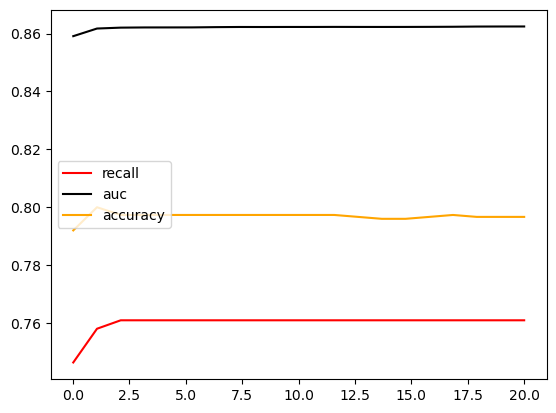

In [94]:
# time warning

import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)

recallall = []
aucall = []
scoreall = []

for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C,cache_size = 5000
             ,class_weight = "balanced"
             ).fit(xtrain, ytrain)
    result = clf.predict(xtest)
    score = clf.score(xtest, ytest)
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % \
          (C,score,recall,auc))
    
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
    
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()

可以观察到几个现象。

首先，我们注意到，随着C值逐渐增大，模型的运行速度变得越来越慢。对于SVM这个本来运行就不快的模型来说，巨大的C值会是一个比较危险的消耗。所以正常来说，我们应该设定一个较小的C值范围来进行调整。

其次，C很小的时候，模型的各项指标都很低，但当C到1以上之后，模型的表现开始逐渐稳定，在C逐渐变大之后，模型的效果并没有显著地提高。可以认为我们设定的C值范围太大了，然而再继续增大或者缩小C值的范围AUC面积也只能够在0.86上下进行变化了，调节C值不能够让模型的任何指标实现质变。

我们把目前为止最佳的C值带入模型，看看我们的准确率，Recall的具体值:

In [ ]:
times = time()
clf = SVC(kernel = "linear",C=3.1663157894736838,cache_size = 5000
         ,class_weight = "balanced"
         ).fit(xtrain, ytrain)
result = clf.predict(xtest)
score = clf.score(xtest,ytest)
recall = recall_score(ytest, result)
auc = roc_auc_score(ytest,clf.decision_function(xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

可以看到，这种情况下模型的准确率，Recal和AUC都没有太差，但是也没有太好，这也许就是追求平衡后结果。

现在，光是调整支持向量机本身的参数，已经不能够满足我们的需求了，要想让AUC面积更进一步，我们需要绘制ROC曲线，查看我们是否可以通过调整阈值来对这个模型进行改进。

In [ ]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt

FPR, Recall, thresholds = ROC(ytest,clf.decision_function(xtest),pos_label=1)

area = roc_auc_score(ytest,clf.decision_function(xtest))

plt.figure()
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

基于这个模型求解最佳阈值

In [ ]:
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

基于阈值，我们来人为确定y_predict(也就是说不调用predict)，并确定在这个阈值下的reccall和accyracy的值

In [ ]:
from sklearn.metrics import accuracy_score as AC

times = time()
clf = SVC(kernel = "linear",C=3.1663157894736838,cache_size = 5000
         ,class_weight = "balanced"
         ).fit(xtrain, ytrain)

prob = pd.DataFrame(clf.decision_function(xtest))

prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0


In [ ]:

prob.loc[:, "y_pred"].isnull().sum()


In [ ]:

#检查模型本身的准确度
score = AC(ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

反而还不如我们不调整时的效果好。可见，如果我们追求平衡，那SVC本身的结果就已经非常接近最优结果了。调节阈值，调节参数C和调节class weight都不一定有效果。

但整体来看，我们的模型不是一个糟糕的模型。

还可以更加深入地探索模型，或者换别的方法来处理特征，以达到AUC面积0.9以上，或是准确度或recall都提升到90%以上。（梯度提升树）